# Multinomial logistic regression

## Theory



**Problem formulation**

Let $\mathbf{x} \in \mathbb{R}^D$ denote an input vector (e.g. the image of a handwritten digit) and $y \in \{1,...,C\}$ the corresponding label (e.g. the digit class).

We assume that there exist a function $f(\cdot; \boldsymbol\theta): \mathbb{R}^D \mapsto [0,1]^C$ parametrized by $\boldsymbol\theta \in \mathbb{R}^P$ such that:

$$p(y=c|\mathbf{x} ; \theta) = f_c(\mathbf{x}; \boldsymbol\theta), \qquad \forall c \in \{1,...,C\},$$

where $f_c(\mathbf{x}; \boldsymbol\theta)$ is the $c$-th entry of $f(\mathbf{x}; \boldsymbol\theta) \in [0,1]^C$. 

Our goal is to build and train a model $f(\mathbf{x}; \boldsymbol\theta)$ such that the prediction

$$ \hat{y} = \arg\max_{c \in \{1,...,C\}} p(y=c|\mathbf{x} ; \theta) $$

is as close as possible to the true label $y$.

**Model**

Using the [softmax function](https://en.wikipedia.org/wiki/Softmax_function), our model $f_c(\mathbf{x}; \boldsymbol\theta)$ is defined as follows:

$$ f_c(\mathbf{x}; \boldsymbol\theta) = \frac{\exp(\boldsymbol\theta_c^\top \mathbf{x} + b_c)}{ \sum_{k=1}^C \exp(\boldsymbol\theta_k^\top \mathbf{x} + b_k)}, $$

where $\boldsymbol\theta = \{\boldsymbol\theta_c \in \mathbb{R}^D, b_c \in \mathbb{R}\}_{c=1}^{C}$ are the model parameters.

This is the [multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) model. Even though the name contains "regression", it is a model used for solving classification problems.

Multinomial logistic regression is considered as a linear method, because the prediction is computed by a linear combination of the input features, plus a bias. The softmax function, which is indeed not linear, is only introduced to ensure that $f_c(\mathbf{x}; \boldsymbol\theta) \ge 0$ and $\sum_{c=1}^C f_c(\mathbf{x}; \boldsymbol\theta) = 1$, which are properties required to interpret the output as a probability.

Note that the bias terms $b_c$ can be integrated into the weight vector $\boldsymbol\theta_c$ if we consider that the input vector $\mathbf{x}$ has an additional dimension equal to 1. The model thus simplifies as:

$$ f_c(\mathbf{x}; \boldsymbol\theta) = \frac{\exp(\boldsymbol\theta_c^\top \mathbf{x})}{ \sum_{k=1}^C \exp(\boldsymbol\theta_k^\top \mathbf{x})}. $$

In the following, we assume that the data dimension $D$ already includes this additional input.

**Loss function**

We assume that we have access to a training dataset of $N$ i.i.d samples $ \{(\mathbf{x}_i, y_i) \in \mathbb{R}^D \times \{1,...,C\}\}_{i=1}^N$. We are in a **supervised** learning framework.

The empirical risk is defined by:

$$ \mathcal{L}(\boldsymbol\theta) = \frac{1}{N} \sum_{i=1}^N \ell(y_i, f(\mathbf{x}_i; \boldsymbol\theta)), $$

where $\ell$ is a loss function measuring the discrepancy between the true label $y_i$ and the prediction $f(\mathbf{x}_i; \boldsymbol\theta)$. In multinomial logistic regression, we use the negative log-likelihood (NLL) as loss function. 

Let us define the one-hot vector $\mathbf{t}_i \in \{0,1\}^C$ encoding the true label $y_i$:

$$ t_{i,c} = [\mathbf{t}_i]_c = \begin{cases} 1 \hspace{.25cm} \text{if } y_i =c \\ 0 \hspace{.25cm} \text{otherwise }  \end{cases}.$$



The NLL loss function is defined by:

$$
\begin{aligned}
\ell(y_i, f(\mathbf{x}; \boldsymbol\theta)) &= - \ln p(\mathbf{x}_i,y_i; \boldsymbol\theta) \\
&= - \ln p(y_i | \mathbf{x}_i ; \boldsymbol\theta) + cst(\boldsymbol\theta) \\
&= - \ln \prod_{c=1}^{C} p(y_i=c | \mathbf{x}_i ; \boldsymbol\theta)^{t_{i,c}} \\
&= - \ln \prod_{c=1}^{C} f_c(\mathbf{x}_i; \boldsymbol\theta)^{t_{i,c}} \\
&= - \sum_{c=1}^{C} t_{i,c} \ln f_c(\mathbf{x}_i; \boldsymbol\theta)
\end{aligned}
$$

The complete loss function is therefore given by:

$$ \mathcal{L}(\boldsymbol\theta) = - \frac{1}{N} \sum_{i=1}^N \sum_{c=1}^{C} t_{i,c} \ln f_c(\mathbf{x}_i; \boldsymbol\theta). $$

This is called the **cross-entropy loss**.

**Optimization algorithm**

To estimate the model parameters $\boldsymbol\theta$ we have to minimize the loss function $\mathcal{L}(\boldsymbol\theta)$. To do so, we can use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm. It is an iterative algorithm which consists in iterating:

$$ \boldsymbol\theta \leftarrow \boldsymbol\theta - \eta \nabla \mathcal{L}(\boldsymbol\theta), $$

where $\eta$ is the learning rate. Both the learning rate and the initialization of the parameters have a critical influence on the behavior of the algorithm.

We will perform this update independently for all $\boldsymbol\theta_j \in \boldsymbol\theta$, $j \in \{1,...,C\}$, so we need to compute 

$$\nabla_{\boldsymbol\theta_j} \mathcal{L}(\boldsymbol\theta) =  - \frac{1}{N} \sum_{i=1}^N \sum_{c=1}^{C} t_{i,c} \nabla_{\boldsymbol\theta_j} \ln f_c(\mathbf{x}_i; \boldsymbol\theta). $$

We can show that for $j=c$:

$$\nabla_{\boldsymbol\theta_j} \ln f_c(\mathbf{x}_i; \boldsymbol\theta) = (1 - f_c(\mathbf{x}_i; \boldsymbol\theta)) \mathbf{x}_i, $$

and for $j \neq c$:

$$\nabla_{\boldsymbol\theta_j} \ln f_c(\mathbf{x}_i; \boldsymbol\theta) =  - f_j(\mathbf{x}_i; \boldsymbol\theta)) \mathbf{x}_i. $$

Therefore, for all $j \in \{1,...,C\}$ we have:

$$\nabla_{\boldsymbol\theta_j} \ln f_c(\mathbf{x}_i; \boldsymbol\theta) = (t_{i,j} - f_j(\mathbf{x}_i; \boldsymbol\theta)) \mathbf{x}_i .$$

**The proof is left as an exercise**

Injecting this solution into the expression of $\nabla_{\boldsymbol\theta_j} \mathcal{L}(\boldsymbol\theta)$ we have:

$$
\begin{aligned}
\nabla_{\boldsymbol\theta_j} \mathcal{L}(\boldsymbol\theta) &=  \frac{1}{N} \sum_{i=1}^N (f_j(\mathbf{x}_i; \boldsymbol\theta) - t_{i,j}) \mathbf{x}_i.
\end{aligned}
$$

## Practical work

We start by loading a dataset of handwritten digits.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score

def to_one_hot(y):
    y_one_hot = np.zeros((y.shape[0], y.max()+1))
    y_one_hot[np.arange(y.shape[0]),y] = 1
    return y_one_hot

def proba_to_class(y_hat):
    return np.argmax(y_hat, axis=1)   

# Each datapoint is a 8x8 image of a digit (between 0 and 9)
x_digits, y_digits = datasets.load_digits(return_X_y=True)
x_digits = x_digits / x_digits.max()
x_digits = np.hstack((x_digits, np.ones((x_digits.shape[0],1))))

n_samples = len(x_digits)

x_train = x_digits[:int(.9 * n_samples)] # training images
y_train = y_digits[:int(.9 * n_samples)] # training labels
x_test = x_digits[int(.9 * n_samples):] # testing images
y_test = y_digits[int(.9 * n_samples):] # testing labels

# we convert the labels to one-hot vectors
y_one_hot_train = to_one_hot(y_train)
y_one_hot_test = to_one_hot(y_test)

In [2]:
print(x_train.shape)
print(y_train.shape)
print(y_one_hot_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_one_hot_test.shape)

(1617, 65)
(1617,)
(1617, 10)
(180, 65)
(180,)
(180, 10)


We look at the first 5 training images

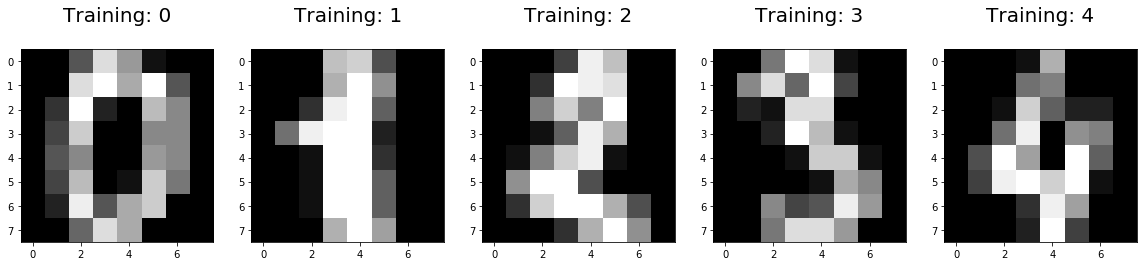

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5,:-1], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

Read the following functions to understand what they implement.

In [5]:
def softmax(x):
    """
    Computes the softmax function.
    Input: x (N, D) array
    Returns: (N, D) array
    """
    num = np.exp(x)
    den = np.sum(num, axis=1)
    return num/den[:,np.newaxis]

def prediction(x, theta):
    """
    Computes the multinomial logistic regression prediction
    Input: x (N, D) array
           theta (C, D) array where C is the number of classes
    Returns: prediction (N, C) array of class probabilities
    """
    return softmax(x @ theta.T) # (N, C)
   
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes the averaged cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, C) array
           targets (N, C) array        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

def cross_entropy_grad(predictions, targets, x):
    """
    Computes the gradient of the cross entropy loss
    Input: predictions (N, C) array
           targets (N, C) array    
           x (N, D) array
    Returns: gradient (C, D) array 
    """
    C = predictions.shape[1]
    D = x.shape[1]
    grad = np.zeros((C, D))
    
    for j in np.arange(C):
        tmp = predictions[:,j] - targets[:,j]
        grad[j,:] = np.mean( tmp[:, np.newaxis]*x, axis=0 )
    
    return grad

Complete the following cell to implement the gradient descent algorithm using the above functions. After each epoch, you will compute the cross entropy and append it to the list `ce_train`. You will also compute the accuracy using the `accuracy_score` function of scikit-learn and append it to the list `acc_train`.

Run the algorithm and play with the hyperparameters (learning rate, number of iterations) to understand their influence.

In [8]:
D = x_train.shape[1] # dimension of the input vector (i.e. the image of a handwritten digit) = 65
N = x_train.shape[0] # number of training examples = 1617
C = y_one_hot_train.shape[1] # number of classes = 10

ce_train = [] 
acc_train = []

theta = np.random.randn(C, D) # model parameters
lr = 0.1 # learning rate for GD algorithm
n_iter = 100 # number of iter. for GD algo.

for epoch in np.arange(n_iter):

    # compute the prediction
    y_prob_train_hat = prediction(x_train, theta)
    
    # compute the gradient of the loss
    grad = cross_entropy_grad(y_prob_train_hat, y_one_hot_train, x_train)
    
    # do a step of gradient descent
    theta = theta - lr*grad
        
    # compute the cross-entropy loss
    ce_train.append(cross_entropy(y_prob_train_hat, y_one_hot_train))
    
    # compute the estimated class given the vector of probabilities
    y_train_hat = proba_to_class(y_prob_train_hat)
    acc_train.append(accuracy_score(y_train, y_train_hat))

Text(0.5, 0, 'iterations')

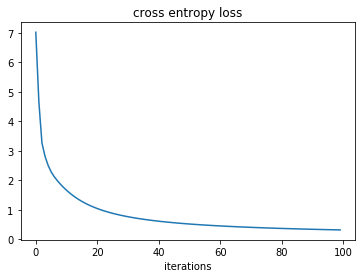

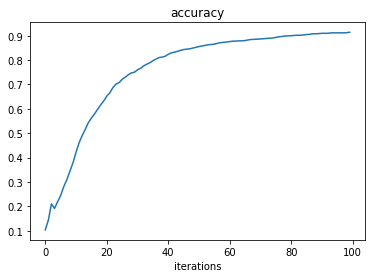

In [9]:
plt.figure()
plt.plot(ce_train)
plt.title('cross entropy loss')
plt.xlabel('iterations')
plt.figure()
plt.plot(acc_train)
plt.title('accuracy')
plt.xlabel('iterations')

Once you are satisfied with your performance on the training set, compute the accuracy on the test set. 

In [10]:
# compute the prediction on the test set
y_prob_test_hat = prediction(x_test, theta)

# compute the estimated class given the vector of probabilities
y_test_hat = proba_to_class(y_prob_test_hat)

# compute the accuracy on the test set
acc_test = accuracy_score(y_test, y_test_hat)

print(acc_test)

0.8944444444444445


Create a validation set from the training set and find a way to use it in order to stop the gradient descent algorithm.